In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import datetime

Kaggle에서 가져온 데이터셋: https://www.kaggle.com/datasets/gianinamariapetrascu/top-100-k-drama-2023 

In [38]:
df = pd.read_csv("C:/Users/lhi30/Haein/2023/YBIGTA/DA/Junior_Session/Assignments/HW3/top100_kdrama.CSV")

In [7]:
df.head()

,ID,Title,Genre,Tags,Synopsis,Rank,Popularity,Score,Episodes,Duration,Watchers,Start_date,End_date,Day_aired,Main Role
0,1,Move to Heaven,"Life, Drama","Uncle-Nephew Relationship, Autism, Death, Sava...",Han Geu Roo is a 20-year-old with Autism. He w...,8,94,9.2,10,52,"64,103",5/14/2021,NaN,Friday,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee"
1,2,Weak Hero Class 1,"Action, Youth, Drama","Smart Male Lead, Bromance, School Bullying, Vi...",Yeon Shi Eun is a model student who ranks at t...,12,290,9.1,8,40,"32,415",11/18/2022,NaN,Friday,"Park Ji Hoon, Hong Kyung, Choi Hyun Wook, Kim ..."
2,3,Hospital Playlist Season 2,"Romance, Life, Drama, Medical","Multiple Mains, Band, Music, Strong Female Lea...",Everyday is extraordinary for five doctors and...,14,177,9.1,12,100,"43,574",6/17/2021,9/16/2021,Thursday,"Jo Jung Suk, Jung Kyung Ho, Jeon Mi Do, Yoo Ye..."
3,4,Flower of Evil,"Thriller, Romance, Crime, Melodrama","Deception, Family Secret, Mystery, Suspense, S...",Although Baek Hee Sung is hiding a dark secret...,16,31,9.1,16,70,"94,811",7/29/2020,9/23/2020,"Wednesday, Thursday","Lee Joon Gi, Jang Hee Jin, Moon Chae Won, Seo ..."
4,5,Hospital Playlist,"Romance, Life, Drama, Medical","Nice Male Lead, Multiple Mains, Slow Romance, ...",The stories of people going through their days...,17,51,9.1,12,90,"81,568",3/12/2020,5/28/2020,Thursday,"Jo Jung Suk, Jung Kyung Ho, Jeon Mi Do, Yoo Ye..."


Check for missing values.

In [8]:
df.isnull().sum()

ID             0
Title          0
Genre          0
Tags           0
Synopsis       0
Rank           0
Popularity     0
Score          0
Episodes       0
Duration       0
Watchers       0
Start_date     0
End_date      12
Day_aired      0
Main Role      0
dtype: int64

'End_date'에 12개의 null 데이터가 있다. 그 데이터는 어떤 특징을 가지고 있는 지 보자.

In [9]:
df[df.isnull().any(axis=1)]

,ID,Title,Genre,Tags,Synopsis,Rank,Popularity,Score,Episodes,Duration,Watchers,Start_date,End_date,Day_aired,Main Role
0,1,Move to Heaven,"Life, Drama","Uncle-Nephew Relationship, Autism, Death, Sava...",Han Geu Roo is a 20-year-old with Autism. He w...,8,94,9.2,10,52,"64,103",5/14/2021,NaN,Friday,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee"
1,2,Weak Hero Class 1,"Action, Youth, Drama","Smart Male Lead, Bromance, School Bullying, Vi...",Yeon Shi Eun is a model student who ranks at t...,12,290,9.1,8,40,"32,415",11/18/2022,NaN,Friday,"Park Ji Hoon, Hong Kyung, Choi Hyun Wook, Kim ..."
8,9,The Glory Part 2,"Thriller, Drama, Melodrama","Strong Female Lead, Revenge, Suspense, Brief N...",Moon Dong Eun's silent fury against those stud...,27,573,9.0,8,55,"19,698",3/10/2023,NaN,Friday,"Song Hye Kyo, Im Ji Yeon, Park Sung Hoon, Lee ..."
20,21,The Glory,"Thriller, Drama, Melodrama","Revenge, School Bullying, School Violence, Str...",A high school student dreams of becoming an ar...,68,202,8.9,8,50,"40,456",12/30/2022,NaN,Friday,"Song Hye Kyo, Im Ji Yeon, Park Sung Hoon, Lee ..."
21,22,Kingdom Season 2,"Thriller, Historical, Horror, Supernatural","Zombies, Corruption, Strong Male Lead, Gore, S...","Following the events in season one, waves of t...",70,249,8.9,6,45,"36,037",3/13/2020,NaN,Friday,"Joo Ji Hoon, Kim Sung Gyu, Bae Doo Na"
33,34,D.P.,"Action, Military, Drama","Military Abuse, Violence, Bromance, Desertion,...",Private soldier Jun Ho is a confused youth who...,120,207,8.8,6,50,"39,966",8/27/2021,NaN,Friday,"Jung Hae In, Kim Sung Kyun, Koo Kyo Hwan, Son ..."
34,35,Kingdom,"Thriller, Historical, Horror, Political","Joseon Dynasty, Adapted From A Webtoon, Power ...",No sooner does the Joseon King succumb to smal...,129,113,8.8,6,51,"58,560",1/25/2019,NaN,Friday,"Joo Ji Hoon, Bae Doo Na, Ryu Seung Ryong, Kim ..."
57,58,Sweet Home,"Action, Horror, Drama, Sci-Fi","Monsters, Gore, Survival, Character Developmen...",Following the death of his family in an accide...,201,63,8.7,10,52,"75,786",12/18/2020,NaN,Friday,"Song Kang, Lee Si Young, Kim Nam Hee, Park Gyu..."
65,66,My Name,"Action, Thriller, Mystery, Crime","Blood, Revenge, Lying, Murder, Double Identity...","Following her father's murder, a revenge-drive...",221,87,8.7,8,50,"65,658",10/15/2021,NaN,Friday,"Han So Hee, Ahn Bo Hyun, Park Hee Soon"
71,72,Love to Hate You,"Comedy, Law, Romance","Badass Female Lead, Enemies To Lovers, Social ...",Yeo Mi Ran is a rookie attorney at Gilmu Law F...,241,471,8.7,10,52,"22,953",2/10/2023,NaN,Friday,"Kim Ok Bin, Kim Ji Hoon, Yoo Teo, Go Won Hee"


End_date가 없는 데이터들을 살펴보니 모두 OTT 오리지널 드라마인걸로 보인다. OTT에서 제작하는 드라마 중 많은 드라마가 모든 에피소드가 한번에 올라오는 방식으로 되어 있어서 End_date를 따로 기입하기 어려웠던 걸로 보인다. 그러므로 이 부분은 해당 행의 Start_date 값을 넣어주겠다.

In [39]:
df.End_date = df.End_date.fillna(df.Start_date)
df[df.isnull().any(axis=1)]

,ID,Title,Genre,Tags,Synopsis,Rank,Popularity,Score,Episodes,Duration,Watchers,Start_date,End_date,Day_aired,Main Role


In [11]:
df.dtypes

ID              int64
Title          object
Genre          object
Tags           object
Synopsis       object
Rank            int64
Popularity      int64
Score         float64
Episodes        int64
Duration        int64
Watchers       object
Start_date     object
End_date       object
Day_aired      object
Main Role      object
dtype: object

### Start_date & End_date




In [49]:
df['Start_date'] = pd.to_datetime(df['Start_date'])
df['End_date']=pd.to_datetime(df['End_date'])

In [50]:
df['Air_duration'] = df['End_date'] - df['Start_date']
df[['Title','Start_date', 'End_date','Air_duration']]

,Title,Start_date,End_date,Air_duration
0,Move to Heaven,2021-05-14,2021-05-14,0 days
1,Weak Hero Class 1,2022-11-18,2022-11-18,0 days
2,Hospital Playlist Season 2,2021-06-17,2021-09-16,91 days
3,Flower of Evil,2020-07-29,2020-09-23,56 days
4,Hospital Playlist,2020-03-12,2020-05-28,77 days
...,...,...,...,...
95,Big Mouth,2022-07-29,2022-09-17,50 days
96,Stranger Season 2,2020-08-15,2020-10-04,50 days
97,Designated Survivor: 60 Days,2019-07-01,2019-08-20,50 days
98,Cruel City,2013-05-27,2013-07-30,64 days


In [51]:
df.Air_duration = pd.to_numeric(df.Air_duration.dt.days, downcast='integer')
df.head()

,ID,Title,Genre,Tags,Synopsis,Rank,Popularity,Score,Episodes,Duration,Watchers,Start_date,End_date,Day_aired,Main Role,Air_duration
0,1,Move to Heaven,"Life, Drama","Uncle-Nephew Relationship, Autism, Death, Sava...",Han Geu Roo is a 20-year-old with Autism. He w...,8,94,9.2,10,52,"64,103",2021-05-14,2021-05-14,Friday,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee",0
1,2,Weak Hero Class 1,"Action, Youth, Drama","Smart Male Lead, Bromance, School Bullying, Vi...",Yeon Shi Eun is a model student who ranks at t...,12,290,9.1,8,40,"32,415",2022-11-18,2022-11-18,Friday,"Park Ji Hoon, Hong Kyung, Choi Hyun Wook, Kim ...",0
2,3,Hospital Playlist Season 2,"Romance, Life, Drama, Medical","Multiple Mains, Band, Music, Strong Female Lea...",Everyday is extraordinary for five doctors and...,14,177,9.1,12,100,"43,574",2021-06-17,2021-09-16,Thursday,"Jo Jung Suk, Jung Kyung Ho, Jeon Mi Do, Yoo Ye...",91
3,4,Flower of Evil,"Thriller, Romance, Crime, Melodrama","Deception, Family Secret, Mystery, Suspense, S...",Although Baek Hee Sung is hiding a dark secret...,16,31,9.1,16,70,"94,811",2020-07-29,2020-09-23,"Wednesday, Thursday","Lee Joon Gi, Jang Hee Jin, Moon Chae Won, Seo ...",56
4,5,Hospital Playlist,"Romance, Life, Drama, Medical","Nice Male Lead, Multiple Mains, Slow Romance, ...",The stories of people going through their days...,17,51,9.1,12,90,"81,568",2020-03-12,2020-05-28,Thursday,"Jo Jung Suk, Jung Kyung Ho, Jeon Mi Do, Yoo Ye...",77


In [52]:
df.describe()

,ID,Rank,Popularity,Score,Episodes,Duration,Air_duration
count,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,50.500000,179.480000,319.730000,8.770000,18.08000,66.540000,53.860000
std,29.011492,106.655916,367.437313,0.159228,12.24636,13.105955,35.920794
min,1.000000,8.000000,1.000000,8.600000,6.00000,30.000000,0.000000
25%,25.750000,90.750000,88.750000,8.600000,12.00000,60.000000,42.750000
50%,50.500000,179.000000,194.500000,8.700000,16.00000,67.000000,50.000000
75%,75.250000,262.250000,397.500000,8.900000,20.00000,75.000000,64.000000
max,100.000000,368.000000,2197.000000,9.200000,100.00000,100.000000,190.000000


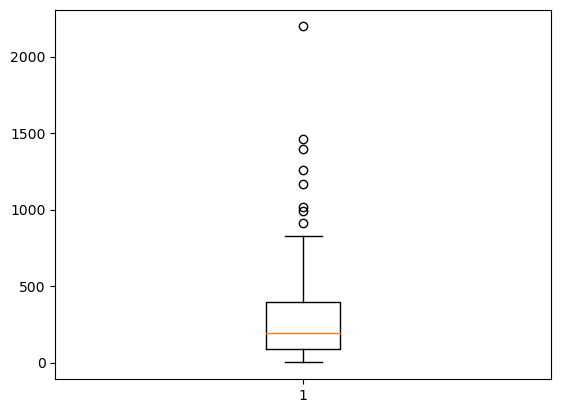

In [55]:
fig = plt.boxplot(df['Popularity'])

Popularity에 특히 더 인기 있는 몇 outlier 존재.

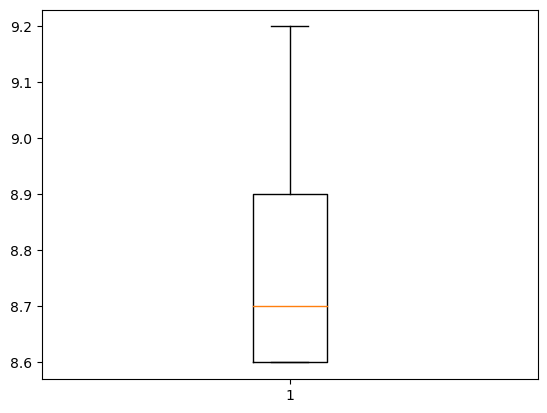

In [56]:
fig = plt.boxplot(df['Score'])

Score는 사람이 임의로 매긴다는 특징에 걸맞게 outlier 없음.

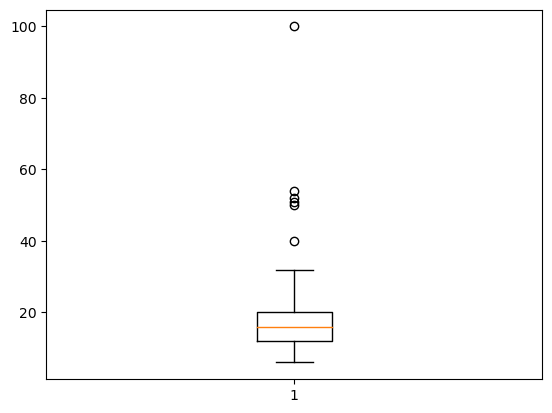

In [57]:
fig = plt.boxplot(df['Episodes'])

Episodes 에서는 특별히 더 많은 회차 수를 가진 드라마 몇 개 존재.

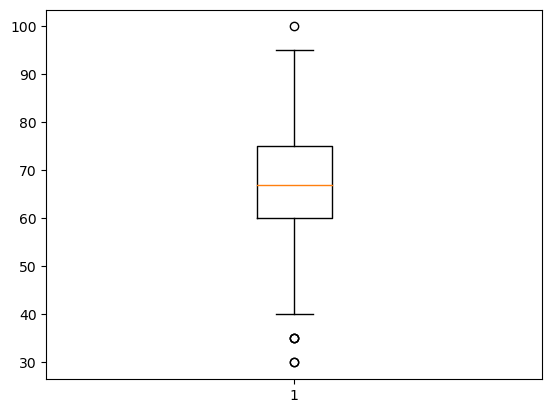

In [58]:
fig = plt.boxplot(df['Duration'])

Duration, 한 회 당 길이를 대강 나타내는 수치인데 양쪽 다 outlier가 존재하나 단편 드라마도 몇 개 있을 것으로 보아 적은 길이의 outlier가 조금 더 많다.

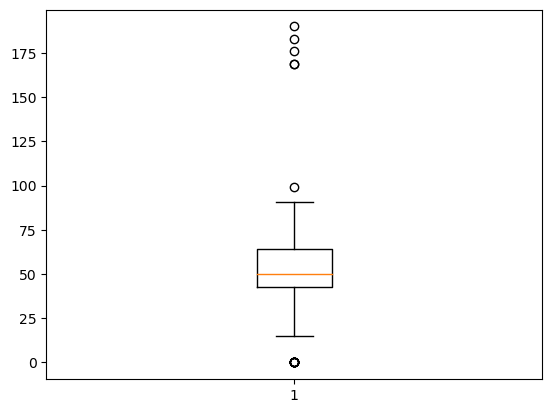

In [59]:
fig = plt.boxplot(df['Air_duration'])

방영 기간은 양쪽 다 outlier 존재하나 특히 더 길게 방영한 드라마가 꽤 있다.

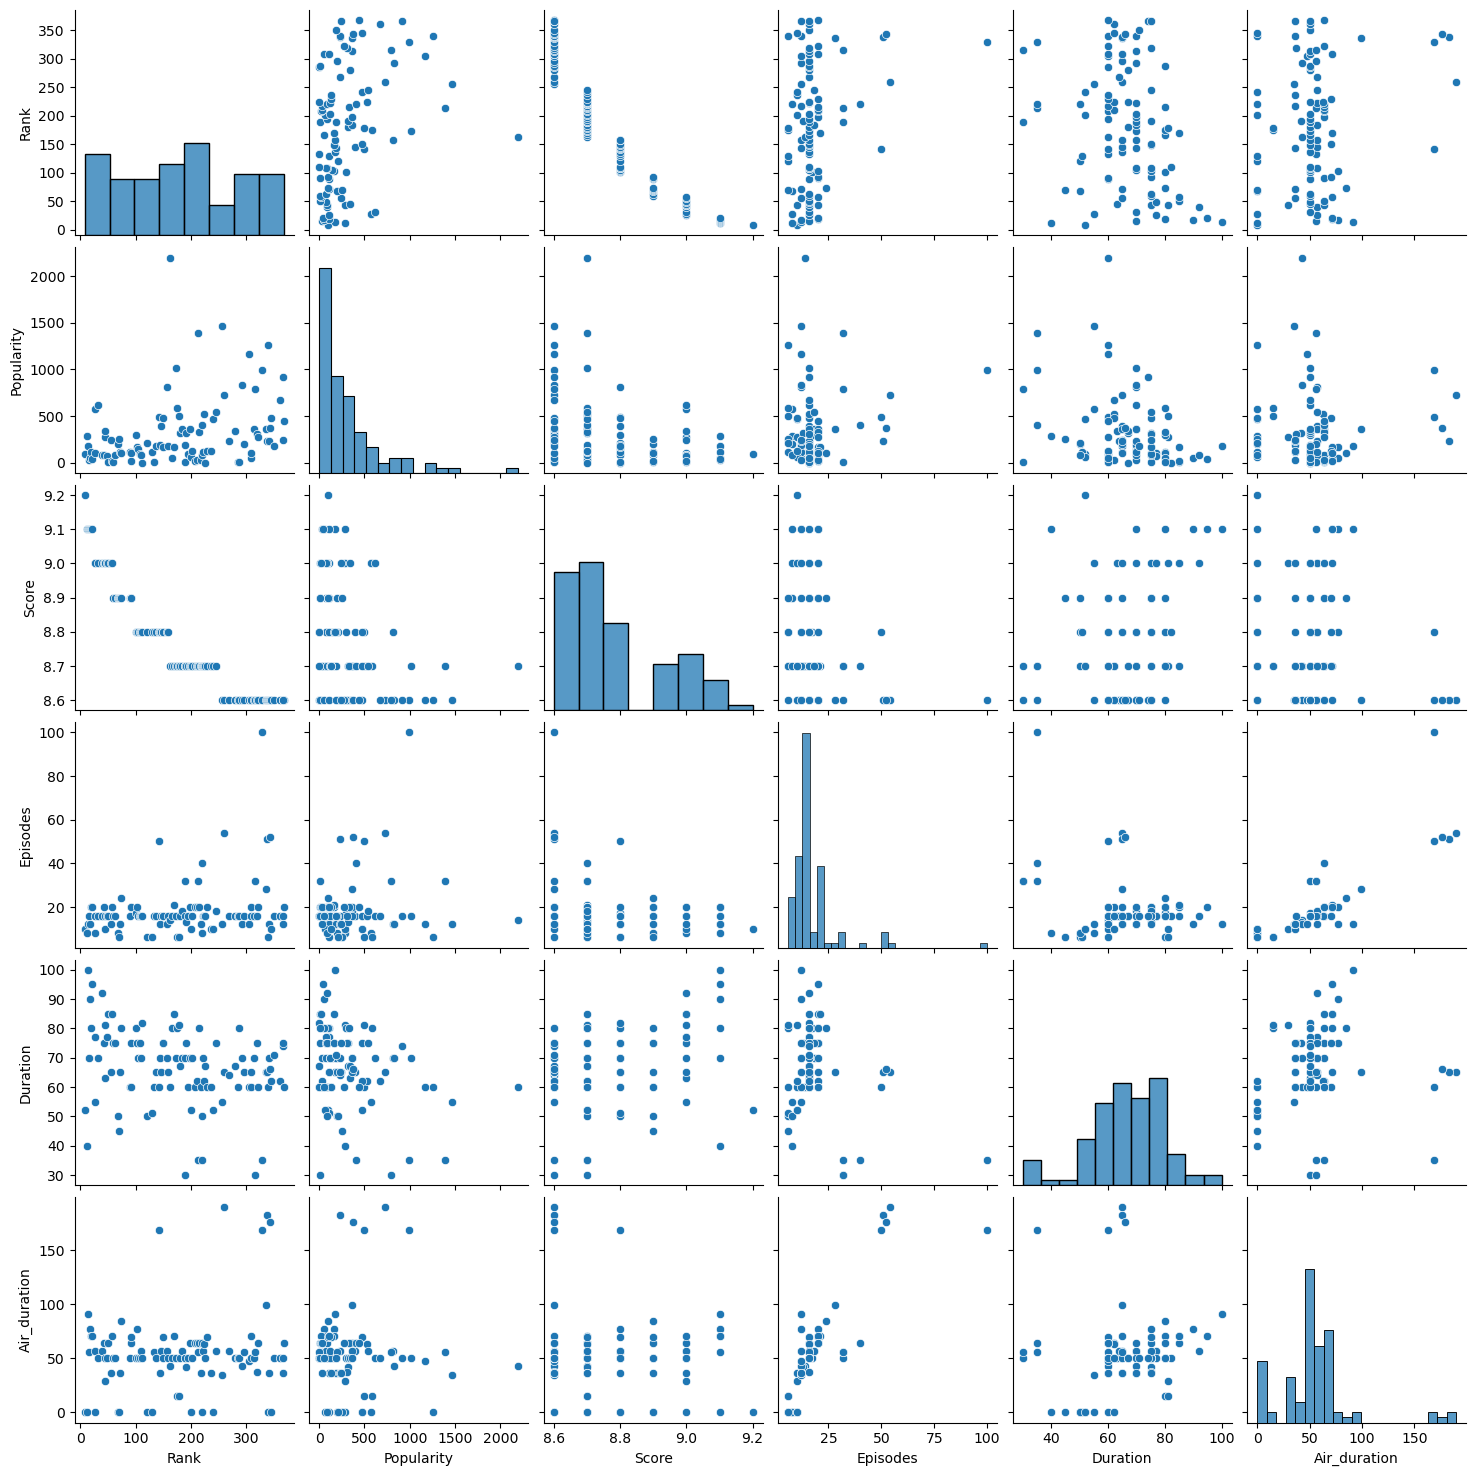

In [64]:
nums = df[['Rank', 'Popularity', 'Score', 'Episodes', 'Duration', 'Air_duration']]
fig = sns.pairplot(nums)
plt.show()

꽤 당연하게 방영 기간과 방영 회수가, 그리고 Rank와 Score가 꽤 상관관계가 있어보이고, 그 외의 관계는 눈에 띄게 선형적인 관계를 보이는 그래프는 없다. 

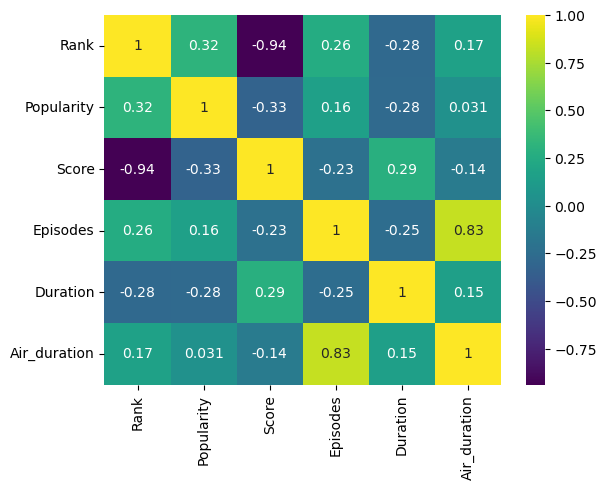

In [68]:
fig = sns.heatmap(nums.corr(), annot=True, cmap = "viridis")
plt.show()

Genre 열에 어떤 값들이 있는 지 살펴보기:

In [89]:
sp = df.Genre.str.split(', ')

In [87]:
def flat(lis):
    flatList = []
    # Iterate with outer list
    for element in lis:
        if type(element) is list:
            # Check if type is list than iterate through the sublist
            for item in element:
                flatList.append(item)
        else:
            flatList.append(element)
    return flatList

In [91]:
allsp = flat(sp)
df_genre = pd.DataFrame(allsp)
df_genre.value_counts()

Drama            63
Romance          45
Thriller         33
Mystery          31
Comedy           28
Life             22
Action           21
Melodrama        17
Fantasy          15
Historical       15
Crime            12
Political        11
Law              11
Psychological    11
Supernatural      8
Medical           7
Horror            6
Sci-Fi            5
Youth             4
Military          3
Business          3
Sports            3
Food              1
dtype: int64

Day_aired column에서 어떤 방영 요일이 많았는 지 보기

In [102]:
df.Day_aired.value_counts()


Saturday, Sunday            26
Monday, Tuesday             21
Friday, Saturday            20
Wednesday, Thursday         16
Friday                      13
Thursday                     2
Sunday, Saturday             1
Friday, Saturday, Sunday     1
Name: Day_aired, dtype: int64

In [94]:
day = df['Day_aired'].str.split(', ')
allday = flat(day)
df_day = pd.DataFrame(allday)
df_day.value_counts()

Saturday     48
Friday       34
Sunday       28
Monday       21
Tuesday      21
Thursday     18
Wednesday    16
dtype: int64